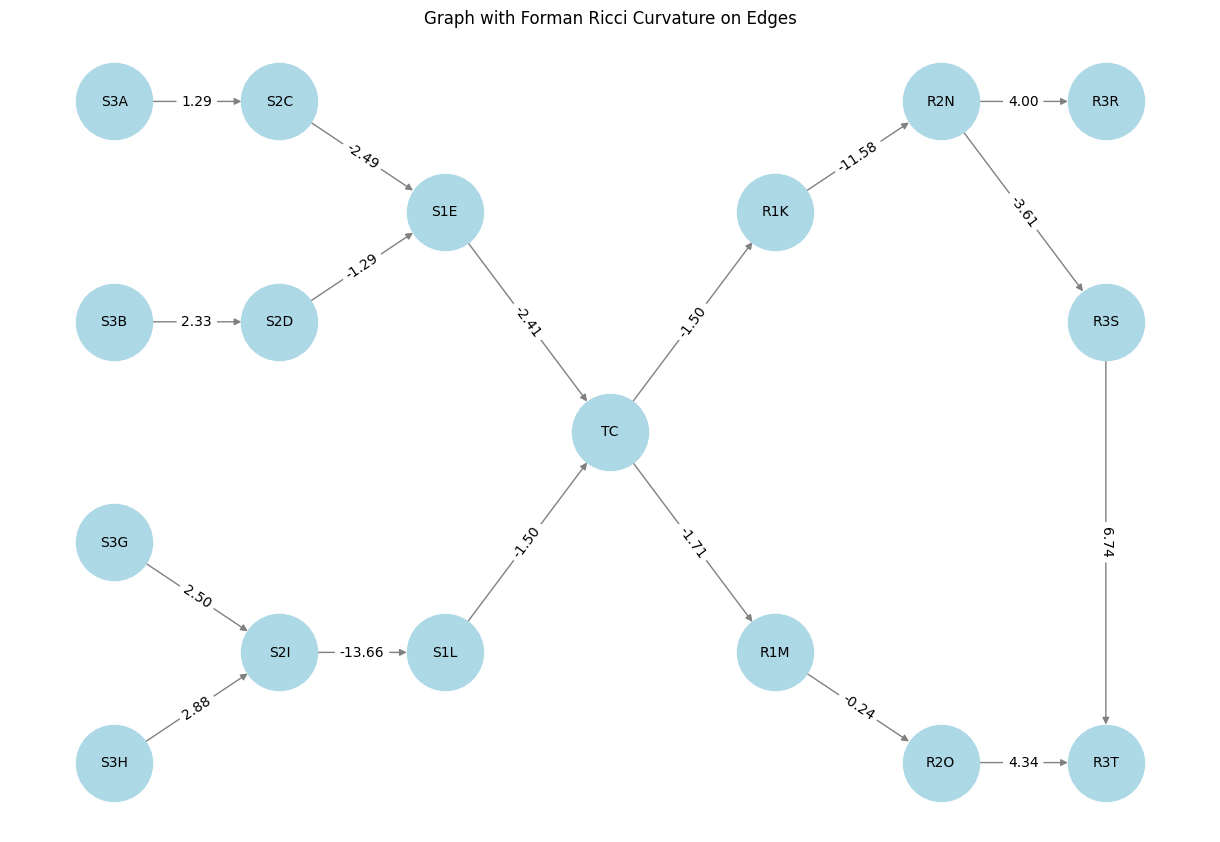

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Create a directed graph
graph = nx.DiGraph()

# Add nodes
nodes = ["S3A", "S3B", "S3G", "S3H", "S2C", "S2D", "S2I", "S1E", "S1L", "TC", "R1K", "R1M", "R2N", "R2O", "R3R", "R3S", "R3T"]
graph.add_nodes_from(nodes)

# Add edges with weights
edges = [
    ("S3A", "S2C", 1),
    ("S3B", "S2D", 3),
    ("S3G", "S2I", 1),
    ("S3H", "S2I", 2),
    ("S2C", "S1E", 2),
    ("S2D", "S1E", 2),
    ("S2I", "S1L", 4),
    ("S1E", "TC", 1),  # Assigned missing weight as 1
    ("S1L", "TC", 1),  # Assigned missing weight as 1
    ("TC", "R1K", 1),  # Assigned missing weight as 1
    ("TC", "R1M", 1),  # Assigned missing weight as 1
    ("R1K", "R2N", 4),
    ("R1M", "R2O", 2),
    ("R2N", "R3R", 1),
    ("R2N", "R3S", 5),
    ("R2O", "R3T", 4),
    ("R3S", "R3T", 2)
]

graph.add_weighted_edges_from(edges)

# Function to calculate Forman-Ricci curvature for directed, weighted graphs
def calculate_forman_ricci(graph):
    for u, v, data in graph.edges(data=True):
        w_e = data['weight']  # Weight of edge (u, v)
        w_v1 = sum(graph[u][nbr]['weight'] for nbr in graph.successors(u)) if graph.out_degree(u) > 0 else 0
        w_v2 = sum(graph[nbr][v]['weight'] for nbr in graph.predecessors(v)) if graph.in_degree(v) > 0 else 0

        # Summation terms for incoming and outgoing edges
        incoming_sum = sum(
            w_v1 / math.sqrt(w_e * graph[nbr][u]['weight'])
            for nbr in graph.predecessors(u) if graph.has_edge(nbr, u)
        )
        outgoing_sum = sum(
            w_v2 / math.sqrt(w_e * graph[v][nbr]['weight'])
            for nbr in graph.successors(v) if graph.has_edge(v, nbr)
        )

        # Forman-Ricci curvature formula
        ricci_curvature = w_e * ((w_v1 / w_e) - incoming_sum) + w_e * ((w_v2 / w_e) - outgoing_sum)
        graph[u][v]['ricci_curvature'] = ricci_curvature

# Calculate Ricci curvature
calculate_forman_ricci(graph)

# Custom positions for better visualization
pos = {
    "S3A": (-2, 2), "S3B": (-2, 1), "S3G": (-2, 0), "S3H": (-2, -1),
    "S2C": (-1, 2), "S2D": (-1, 1), "S2I": (-1, -0.5),
    "S1E": (0, 1.5), "S1L": (0, -0.5),
    "TC": (1, 0.5),
    "R1K": (2, 1.5), "R1M": (2, -0.5),
    "R2N": (3, 2), "R2O": (3, -1),
    "R3R": (4, 2), "R3S": (4, 1), "R3T": (4, -1)
}

# Draw the graph with Ricci curvature
plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
labels = nx.get_edge_attributes(graph, 'ricci_curvature')
nx.draw_networkx_edge_labels(graph, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
plt.title("Graph with Forman Ricci Curvature on Edges")
plt.show()
